# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info

temp = []
cloudiness = []   
humidity = [] 
lat = []
lng = []         
max_temp = []      
wind_speed = []
good_cities = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    response = requests.get(query_url + city).json()  
    try:             
        temp.append(response["main"]["temp"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        good_cities.append(response["name"])
        print(f"processing {city}")
    except KeyError:
        print(f"No {city} found.")
        
        



processing saint-pierre
processing bluff
processing rikitea
processing madras
No taolanaro found.
processing novyy urengoy
No krasnoselkup found.
processing salisbury
processing punta arenas
processing lorengau
processing hilo
No grand river south east found.
processing luderitz
processing norman wells
processing chimbote
processing hobart
processing puerto ayora
No attawapiskat found.
processing kapaa
processing villarrobledo
No muika found.
No satitoa found.
No vaitupu found.
processing tuktoyaktuk
processing menongue
processing bredasdorp
processing nikolskoye
processing meulaboh
processing hamilton
No sentyabrskiy found.
processing kamaishi
processing barrow
processing cherskiy
processing rapid valley
processing saskylakh
processing provideniya
processing bethel
processing klaksvik
No illoqqortoormiut found.
No nizhneyansk found.
processing bambous virieux
processing totness
processing waingapu
processing upernavik
No samusu found.
processing volksrust
processing mataura
processing

processing walvis bay
No meyungs found.
processing tabursuq
processing xam nua
processing shelburne
processing miandrivazo
processing nykoping
processing stromness
processing taoudenni
processing akonolinga
processing laguna
processing upata
processing lensk
No panjwin found.
processing huntsville
processing wuning
processing sistranda
processing baherden
No mullaitivu found.
processing esmeralda
processing hay river
processing sokoto
processing vangaindrano
processing hudson bay
processing mayo
processing belyy yar
processing banjar
processing cowra
processing shache
processing paka
processing tamandare
processing san andres
processing port lincoln
processing lubango
processing beloha
No kamenskoye found.
processing atbasar
No port-de-paix found.
processing blackwater
processing kijang
processing deputatskiy
processing nemuro
processing laem sing
processing mangai
processing hanna
processing dalbandin
processing sobolevo
processing longyearbyen
processing bayan
processing gloversville

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_dict = {
        "city":good_cities,
        "cloudiness":cloudiness,
        "humidity":humidity,
        "latitude":lat,
        "longitude":lng,
        "max_temp":max_temp,
        "wind_speed":wind_speed}
city_data = pd.DataFrame(city_data_dict)
#city_data.count()
city_data.head()


,city,cloudiness,humidity,latitude,longitude,max_temp,wind_speed
0,Saint-Pierre,0,81,48.95,4.24,46.40,18.34
1,Bluff,0,86,-23.58,149.07,71.87,3.09
2,Rikitea,92,100,-23.12,-134.97,75.38,19.64
3,Madras,20,44,44.63,-121.13,44.01,4.70
4,Novyy Urengoy,76,91,66.08,76.63,28.85,10.58


In [6]:
city_data.to_csv("city_data.csv", index=False, header=True )

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

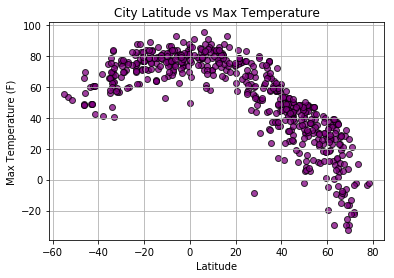

In [21]:
plt.scatter(lat, max_temp, marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.savefig("city_lat_vs_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

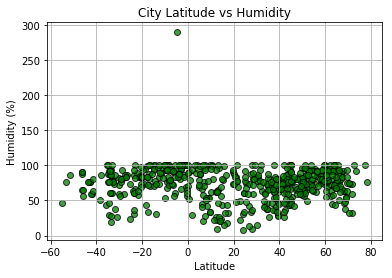

In [15]:
plt.scatter(lat, humidity, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.savefig("city_lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

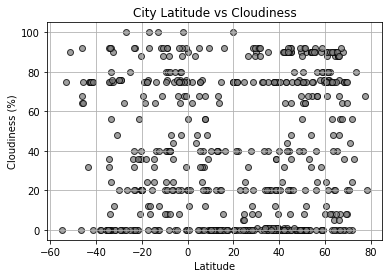

In [16]:
plt.scatter(lat, cloudiness, marker="o", facecolors="gray", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.savefig("city_lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

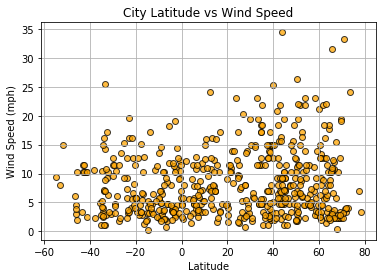

In [22]:
plt.scatter(lat, wind_speed, marker="o", facecolors="orange", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.savefig("city_lat_vs_wind_speed.png")
plt.show()

In [18]:
#Analysis
#Of the four categories max temperature, humidity, cloudiness, and wind speed, only max temperature appears to be closely correlated
# with the city's latitude.  The scatter plot diagram shows a strong correlation because the dots are close together.  
#The shape is a downward curve as the cities move north of the equator which is zero degrees.  

#The scatter plot shape comparing city and humidity is a straight, horizontal line so this means there is no correlation.  
#Cities with 100% humidity are found below, at, and above the equator.  

#Regarding cloudiness, there are several patterns of straignt, horizontal lines throughout the scatter plot which also indicates
# no correlation between cloudiness and city latitude to prove what the weather is like near the equator.  

#Finally, wind speed is also not an appropriate way to determine what weather is like near the equator because the dot are 
# concentrated near toward the lower wind speed but the shape is horizontal indicating no correlation. 